This notebook will implement GCC-PHAT 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.signal as signal 

In [2]:
%matplotlib notebook

In [3]:
fs = 192000
t = np.linspace(0,0.002, 384)
a = signal.chirp(t,85000,t[-1],25000)
a *= signal.tukey(a.size, 0.1)

ch1 = np.random.normal(0,1e-5,1920)
ch2 = np.random.normal(0,1e-5,1920)

time1 = 595
time2 = time1 - 0
time3 = time2 + 192
time4 = time3+ 80
ch1[time1:time1+a.size] += a
for i,each in enumerate([time2, time3, time4]):
    ch2[each:each+a.size] += a*0.01#*(i+1)



In [4]:
time1-np.array([time2, time3, time4])

array([   0, -192, -272])

<IPython.core.display.Javascript object>


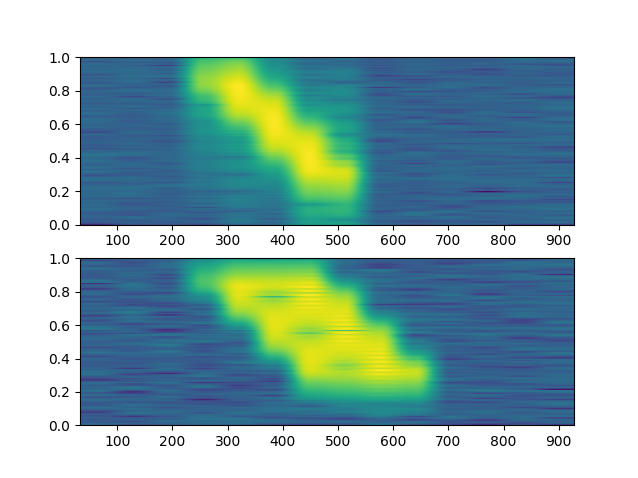

In [5]:
plt.figure()
plt.subplot(211)
plt.specgram(ch1);
plt.subplot(212)
plt.specgram(ch2);

<IPython.core.display.Javascript object>


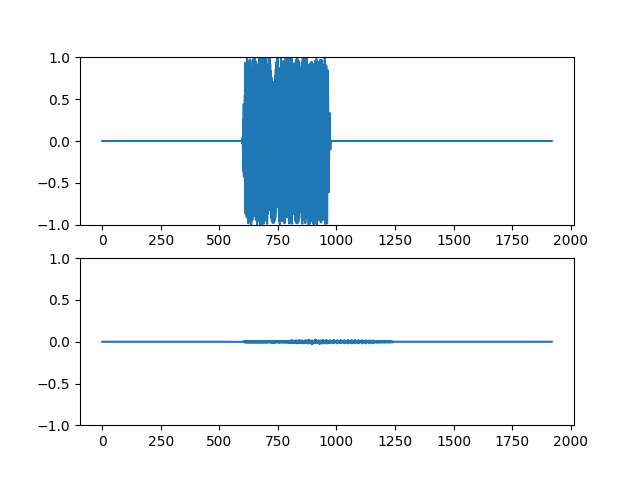

(-1.0, 1.0)

In [6]:
plt.figure()
plt.subplot(211)
plt.plot(ch1);plt.ylim(-1,1)
plt.subplot(212)
plt.plot(ch2);plt.ylim(-1,1)

In [11]:
# following http://www.xavieranguera.com/phdthesis/node92.html
g_phat_num = np.fft.rfft(ch1)*np.conjugate(np.fft.rfft(ch2))
g_phat = g_phat_num/(np.abs(g_phat_num))
gphat_ifft = np.roll(np.fft.irfft(g_phat), int(g_phat.size))

<IPython.core.display.Javascript object>


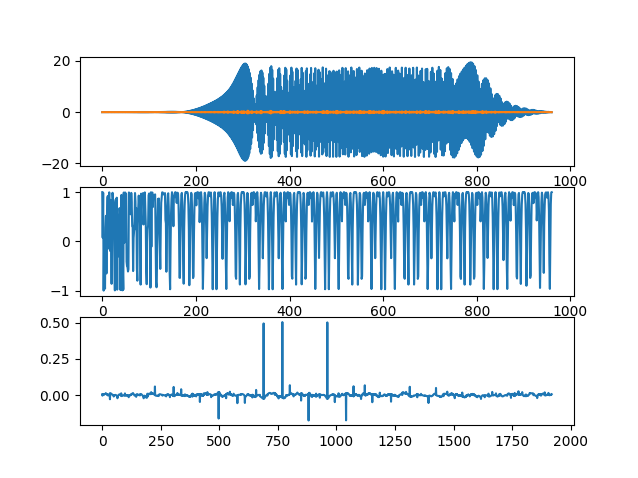

/home/autumn/anaconda3/envs/projushichka/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/autumn/anaconda3/envs/projushichka/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/autumn/anaconda3/envs/projushichka/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


In [12]:
plt.figure()
plt.subplot(311)
plt.plot(np.fft.rfft(ch1))
plt.plot(np.fft.rfft(ch2))
plt.subplot(312)
plt.plot(g_phat)
plt.subplot(313)
plt.plot(gphat_ifft)

In [29]:
peak_inds = np.argwhere(gphat_ifft>np.percentile(gphat_ifft,99.5))
miaow = gphat_ifft[peak_inds].flatten()
max_values = np.sort(miaow)[::-1]
max_values

array([0.50538626, 0.50301664, 0.49606527, 0.06830023, 0.06770485,
       0.06104014, 0.05944149, 0.05754887, 0.05635107, 0.04937819])

In [31]:
np.argwhere(gphat_ifft==max_values[1])

array([[961]])

In [33]:
(961-gphat_ifft.size/2.0)

1.0

In [10]:
if np.argmax(gphat_ifft) > gphat_ifft.size*0.5:
    print(f'delay = {(gphat_ifft.size-np.argmax(gphat_ifft))/fs}')
elif np.argmax(gphat_ifft) <= gphat_ifft.size*0.5:
    print(f'delay = {-(np.argmax(gphat_ifft))/fs} ms')


delay = -0.0015 ms
